<a href="https://colab.research.google.com/github/SaMMYFrosT221b/Malignency_Detection_Using_Deep_Learning/blob/shishu/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-mri-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1608934%2F2645886%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240311%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240311T120114Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dcb169027bbba11b9c4e61eb0e359c542c9037addaaf0022ad10cd302686ded5261a7f46ef05bbf374596f2086ffec24bad1873e622dbaef30087c58a80eb350f5eccccf207d39860a1439026b54b765137f4f7b95ddf578a26cd2a89c255ac68a7256d50ad6cb0a91048e2f1c10e82267073913b89d57f16ea0221e713ed04f5947357c8cbe0548aa3eed60a78b9ad261110f8a23421acfd85891e02f16bfc5e3635bf021134d36c8fb4b27260435d1325c784b47b012a45bb1d0585f4437976848ead6fcc5214a48e7a652677d8d5b6e3482859d6245c0e9240d1a38e21fba81c49943e5a8f25b2bb453210f0ae8932fb4f578516f7c89ff6397b06e0ddc91a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from os import listdir
import time

%matplotlib inline

# Data Augmentation

In [ ]:
# import os
# os.mkdir("/kaggle/working/Augmented_data_Training/pituitary")

In [ ]:
# def augmented_data(cancer,n_generated_samples):
#     save_to_dir = f'/kaggle/working/Augmented_data_Training/{cancer}'
#     image_directory = f'/kaggle/input/brain-tumor-mri-dataset/Training/{cancer}'
#     image_files = os.listdir(image_directory)
#     data_gen = ImageDataGenerator(rotation_range=10,
#                               width_shift_range=0.1,
#                               height_shift_range=0.1,
#                               shear_range=0.1,
#                               brightness_range=(0.3, 1.0),
#                               horizontal_flip=True,
#                               vertical_flip=True,
#                               fill_mode='nearest'
#                              )

#     for image_file in image_files:
#         image_path = os.path.join(image_directory, image_file)
#         image = cv2.imread(image_path)
#         image = image.reshape((1,)+image.shape)
#         save_prefix = 'aug_' + image_file[:-4]
#         # generate 'n_generated_samples' sample images
#         i=0
#         for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir,save_prefix=save_prefix, save_format='jpg'):
#             i += 1
#             if i > n_generated_samples:
#                 break

In [ ]:
# l = ["glioma","pituitary","meningioma","notumor"]
# for i in l:
#     augmented_data(i,n_generated_samples = 6)


In [ ]:
# def augmented_data1(cancer,n_generated_samples):
#     save_to_dir = f'/kaggle/working/Augmented_data_Testing{cancer}'
#     image_directory = f'/kaggle/input/brain-tumor-mri-dataset/Testing{cancer}'
#     image_files = os.listdir(image_directory)
#     data_gen = ImageDataGenerator(rotation_range=10,
#                               width_shift_range=0.1,
#                               height_shift_range=0.1,
#                               shear_range=0.1,
#                               brightness_range=(0.3, 1.0),
#                               horizontal_flip=True,
#                               vertical_flip=True,
#                               fill_mode='nearest'
#                              )

#     for image_file in image_files:
#         image_path = os.path.join(image_directory, image_file)
#         image = cv2.imread(image_path)
#         image = image.reshape((1,)+image.shape)
#         save_prefix = 'aug_' + image_file[:-4]
#         # generate 'n_generated_samples' sample images
#         i=0
#         for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir,save_prefix=save_prefix, save_format='jpg'):
#             i += 1
#             if i > n_generated_samples:
#                 break

In [ ]:
# l = ["glioma","pituitary","meningioma","notumor"]
# for i in l:
#     augmented_data1(i,n_generated_samples = 6)


# Cropping


In [ ]:
def crop_brain_contour(image, plot=False):
    #import cv2
    #from matplotlib import pyplot as plt

    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Grab the largest contour
    c = max(contours, key=cv2.contourArea)


    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')

        plt.show()

    return new_image

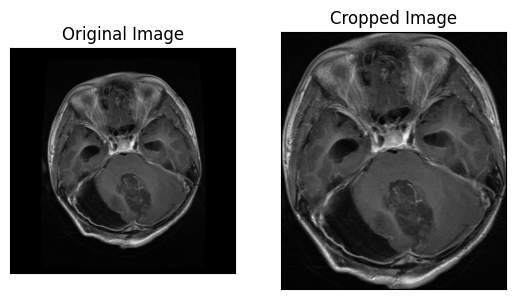

In [ ]:
ex_image = cv2.imread("/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0000.jpg")
new_ex_image = crop_brain_contour(ex_image,True)

# **Folder Path**


In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join('/kaggle/working/Augmented_data_Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        if img is None:
        # print(f"Warning: Unable to load image '{image_path}'")
            continue
        img = crop_brain_contour(img, plot=False)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/kaggle/working/Augmented_data_Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        if img is None:
        # print(f"Warning: Unable to load image '{image_path}'")
            continue
        img = crop_brain_contour(img, plot=False)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(39971, 150, 150, 3)

# Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


# Convolutional Neural Network

In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model

def build_model(input_shape, num_classes):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
        num_classes: Number of classes for multi-class classification.
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)

    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32)

    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)

    # FLATTEN X
    X = Flatten()(X) # shape=(?, 6272)

    # FULLYCONNECTED
    X = Dense(num_classes, activation='softmax', name='fc')(X) # shape=(?, num_classes)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='BrainDetectionModel')

    return model


In [ ]:
IMG_SHAPE = (150, 150, 3)
num_classes = 4
model = build_model(IMG_SHAPE,num_classes)
model.summary()

Model: "BrainDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 154, 154, 3)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 148, 148, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 148, 148, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool0 (MaxPooling2D)        │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool1 (MaxPooling2D)        │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 4)              │        10,372 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,236 (59.52 KB)

 Trainable params: 15,172 (59.27 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.3)

Epoch 1/20
 18/787 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3245 - loss: 2.6698

W0000 00:00:1709543087.926653     383 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


787/787 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6145 - loss: 1.0581

W0000 00:00:1709543097.972155     383 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


787/787 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6146 - loss: 1.0578 - val_accuracy: 0.6851 - val_loss: 0.7951
Epoch 2/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7713 - loss: 0.6160 - val_accuracy: 0.7835 - val_loss: 0.6372
Epoch 3/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8155 - loss: 0.5025 - val_accuracy: 0.8477 - val_loss: 0.4341
Epoch 4/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8325 - loss: 0.4722 - val_accuracy: 0.8332 - val_loss: 0.5311
Epoch 5/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8443 - loss: 0.4331 - val_accuracy: 0.8576 - val_loss: 0.4104
Epoch 6/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8553 - loss: 0.4079 - val_accuracy: 0.6505 - val_loss: 0.8913
Epoch 7/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8650 - loss: 0.3709 - val_accuracy: 0.8351 - val_loss: 0.5047
Epoch 8/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8710 - loss: 0.3629 - val_accuracy: 0.81

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

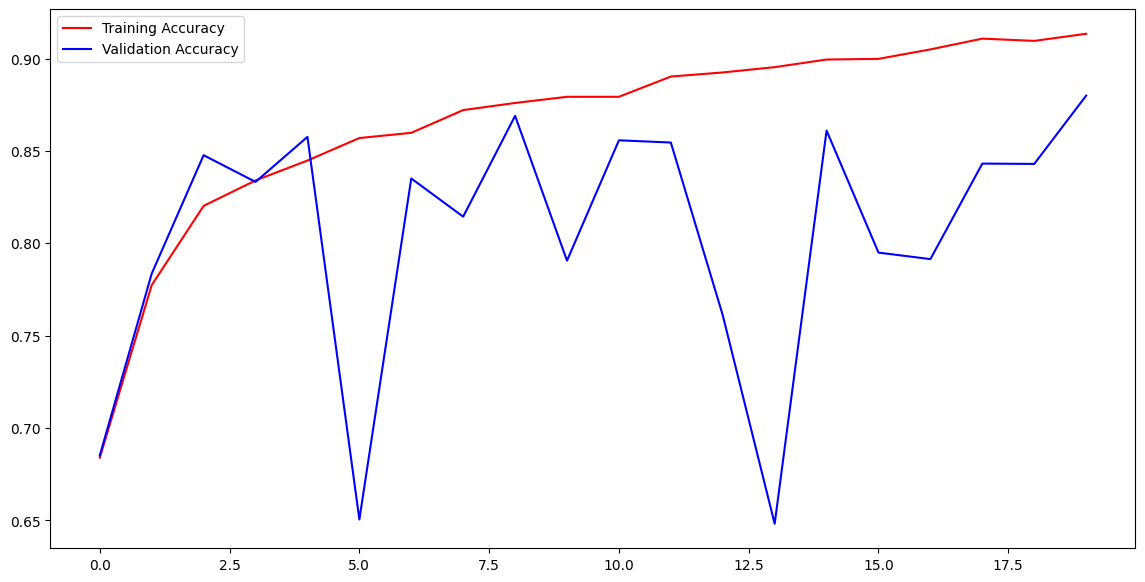

In [ ]:
# model.save('braintumor.h5')

acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

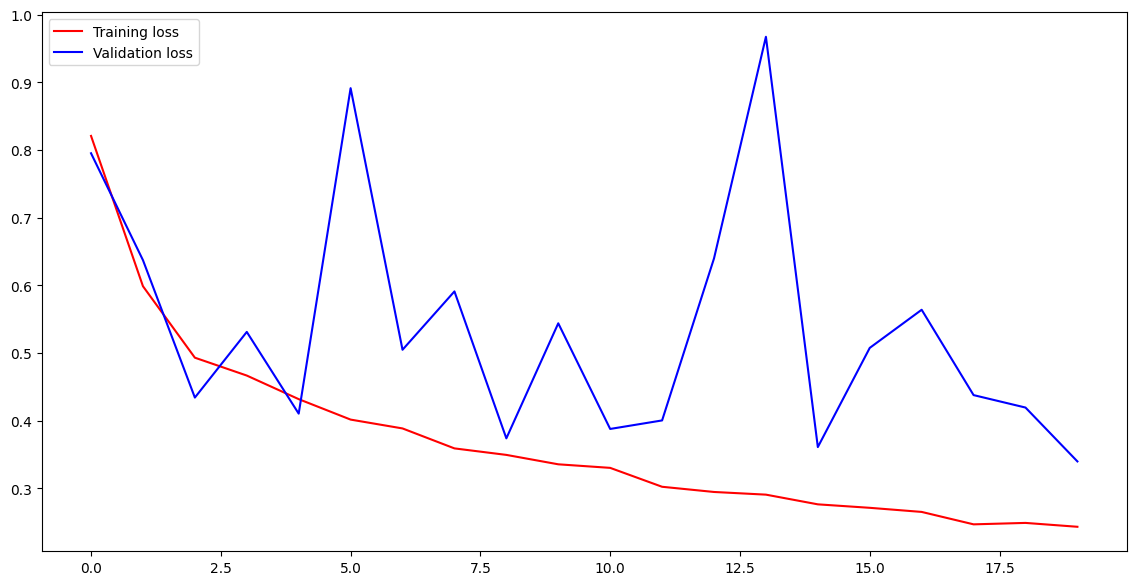

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

 # Prediction


In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)
# You might want to convert the predictions to class labels if you're doing classification
predicted_labels = np.argmax(predictions, axis=1)

 79/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1709543257.048007     385 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


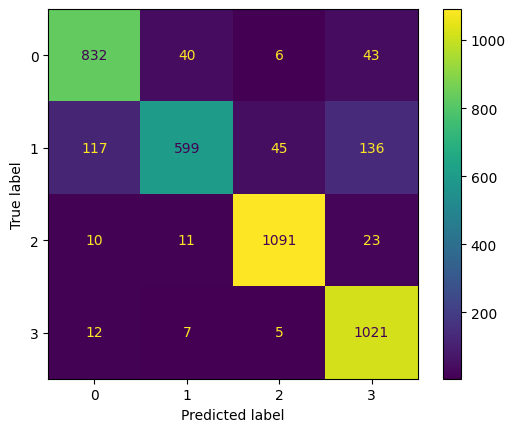

In [ ]:
if y_test.ndim > 1:  # Check if y_test is one-hot encoded
    true_labels = np.argmax(y_test, axis=1)
else:
    true_labels = y_test  # If y_test is already integer labels

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(num_classes)])  # Adjust as per your classes
cm_display.plot()
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels, average='weighted')  # 'macro' or 'micro' can also be used

# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # 'macro' or 'micro' can also be used

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.8861930965482742
Precision: 0.8901841089471166
F1 Score: 0.882354645187047


In [ ]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0006.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

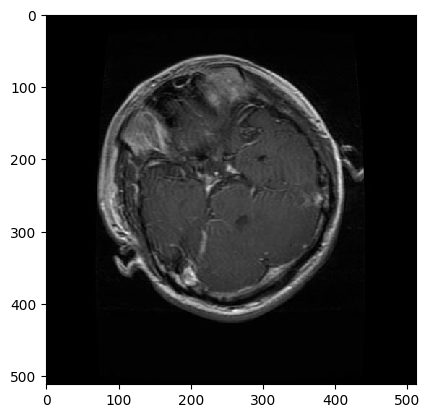

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0006.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
prediction = model.predict(img_array)
index = prediction.argmax()

if index == 0:
    print("Glioma")
if index == 1:
    print("Meningioma")
if index == 2:
    print("NoTumor")
if index == 3:
    print("Pituitary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Glioma


In [ ]:
# Make predictions on the test data
predicted_probabilities = model.predict(X_test)

# Extract probabilities for the positive class (index 1)
positive_class_probabilities = predicted_probabilities[:, 1]


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


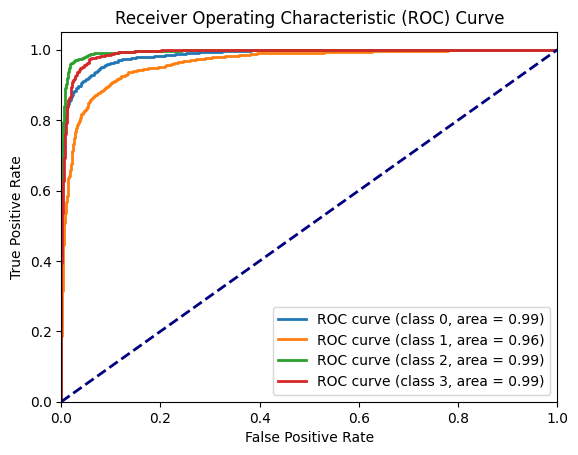

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Assuming you have defined num_classes and predicted_probabilities somewhere in your code

# Convert y_test from one-hot encoding to integer labels
true_labels = np.argmax(y_test, axis=1)

# Binarize the true labels
true_labels_binary = label_binarize(true_labels, classes=[0, 1, 2, 3])  # Assuming you have 4 classes

num_classes = 4  # Update this to 4 since you have 4 classes

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binary[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
